# Data download and cleaning. (and more)
It uses two datasets form Estonian open data.  
[Status of vehicles in Estonia](https://avaandmed.eesti.ee/datasets/soidukite-staatused-eestis) and [Roadworthiness tests of land vehicles in Estonia](https://avaandmed.eesti.ee/datasets/maismaasoidukite-tehnoulevaatused-eestis)

### Download data

In [1]:
# SÃµidukite staatused avaandmetena M1 ja M1G 2023.csv from Status... as vehicle_status.csv
# SÃµidukite staatused avaandmetena va M1 ja M1G 2023.csv from Status... as vehicle_status1.csv
# yv_2023.csv from Road... as vehicle_roadworthiness.csv
# RIKKED codes are in file rike.csv from  Road...

In [2]:
import pandas as pd
import numpy as np

# Read vehicle_status.csv
vehicle_status = pd.read_csv('vehicle_status.csv', delimiter=';', low_memory=False)
vehicle_status1 = pd.read_csv('vehicle_status1.csv', delimiter=';', low_memory=False)

vehicle_status = vehicle_status._append(vehicle_status1)

vehicle_roadworthiness = pd.read_csv('vehicle_roadworthiness.csv', delimiter=',')
rikke_koodid = pd.read_csv('rike.csv')

In [3]:
vehicle_roadworthiness.head(10)

,TEHNOYLEVAATUSPUNKT,PUNKTI_KOOD,TOOTAJA,YV_KUUPAEV,YLEVAATUSLIIK,YLEVAATUSOTSUS,RIKKED,SOIDUK_ID,ESMANE_REG_AASTA,MARK,MUDEL,KATEGOORIA,KERETYYP
0,Händel OÜ,FH,632,2023-05,KORRALINE,KORDUVALE,OV:100103582;VO:100104044,1,2010,ISUZU,D-MAX,N1G,PIKAP
1,E-Tehno OÜ (Tartu Ringtee),TJ,489,2023-09,KORRALINE,KORRAS,NaN,2,2009,KIRE,95,R3A,KALLUR
2,Tehnokonsult OÜ (Jõhvi),ID,729,2023-08,KORDUV,KORRAS,NaN,3,1992,MERCEDES-BENZ,200 D,M1,SEDAAN
3,"Profdiagnostik OÜ (Helgi tee 4, Peetri)",MP,977,2023-07,KORRALINE,KORRAS,NaN,4,2016,ALFA ROMEO,GIULIETTA,M1,LUUKPÄRA
4,Saue Auto AS,MA,967,2023-03,KORRALINE,KORRAS,NaN,5,2006,MITSUBISHI,COLT,M1,UNIVERSAAL
5,Thalia LV,LC,214,2023-07,KORRALINE,KORRAS,NaN,6,2010,KRONE,SDP 27,O4,MADEL
6,L Tehnoülevaatus OÜ (Ahtme),IA,895,2023-07,KORRALINE,KORRAS,NaN,7,1999,AWARD,DAYSTAR,O2,ELAMU
7,Saue Auto AS,MA,855,2023-11,KORRALINE,KORRAS,NaN,8,2008,MAZDA,6,M1,SEDAAN
8,A-Ülevaatus OÜ (Räpina),OR,699,2023-06,KORDUV,KORRAS,NaN,9,2004,PEUGEOT,307,M1,LUUKPÄRA
9,Amserv Viljandi,DE,753,2023-01,KORRALINE,KORRAS,VO:100103780;VO:100103957;VO:100104073;VO:1001...,10,2002,VOLKSWAGEN,SHARAN,M1,MAHTUNIVERSAAL


In [4]:
vehicle_status.head(10)

,Andmed seisuga,YLDINE_STAATUS,EESTIS_ESMAREG_KP,ESMANE_REG_KP,KAIGUKASTI_TYYP,Kütuse tüüp,MOOTORI_TYYP,MOOTORI_MAHT,MOOTORI_VOIMSUS,HYBRIIDI_TYYP,...,TAISMASS,TYHIMASS,TELGI_KOKKU,HEITMENORM,VARV,ISTEKOHTI,Kere nimetus,VK/OM MAAKOND,VK/OM TYYP_,ARV
0,01.12.2023,PEATATUD,01.01.0987,01.01.1987,NaN,BENSIIN,BENSIIN,1452.0,55.0,NaN,...,1510.0,1050.0,2.0,NaN,BEEZ,5.0,UNIVERSAAL,PÕLVA MAAKOND,FYYSILINE,1
1,01.12.2023,PEATATUD,30.12.1899,01.01.1987,NaN,DIISEL,DIISEL,1608.0,40.0,NaN,...,1350.0,910.0,2.0,NaN,BEEZ,5.0,LUUKPÄRA,HARJU MAAKOND,FYYSILINE,1
2,01.12.2023,PEATATUD,01.01.1900,01.01.1939,NaN,BENSIIN,BENSIIN,690.0,15.0,NaN,...,1120.0,750.0,2.0,NaN,MUST,4.0,KUPEE,HARJU MAAKOND,FYYSILINE,1
3,01.12.2023,PEATATUD,01.01.1900,01.01.1939,NaN,BENSIIN,BENSIIN,2120.0,58.0,NaN,...,2020.0,1430.0,2.0,NaN,HALL,5.0,SEDAAN,TARTU MAAKOND,FYYSILINE,1
4,01.12.2023,PEATATUD,01.01.1900,01.01.1948,MANUAAL,BENSIIN,BENSIIN,2445.0,52.0,NaN,...,1550.0,1050.0,2.0,NaN,ROHELINE,5.0,LUUKPÄRA,SAARE MAAKOND,JURIIDILINE,1
5,01.12.2023,PEATATUD,01.01.1900,01.01.1954,NaN,BENSIIN,BENSIIN,2120.0,38.0,NaN,...,1960.0,1535.0,2.0,NaN,ROHELINE,5.0,LAHTINE,JÄRVA MAAKOND,FYYSILINE,1
6,01.12.2023,PEATATUD,01.01.1900,01.01.1955,NaN,BENSIIN,BENSIIN,NaN,38.0,NaN,...,1835.0,1460.0,2.0,NaN,HALL,5.0,SEDAAN,VILJANDI MAAKOND,FYYSILINE,1
7,01.12.2023,PEATATUD,01.01.1900,01.01.1958,NaN,BENSIIN,BENSIIN,2445.0,74.0,NaN,...,1835.0,1385.0,2.0,NaN,TUMEROHELINE,5.0,SEDAAN,RAPLA MAAKOND,FYYSILINE,1
8,01.12.2023,PEATATUD,01.01.1900,01.01.1961,NaN,BENSIIN,BENSIIN,2445.0,52.0,NaN,...,1885.0,1460.0,2.0,NaN,HELEROHELINE,5.0,SEDAAN,IDA-VIRU MAAKOND,FYYSILINE,1
9,01.12.2023,PEATATUD,01.01.1900,01.01.1969,NaN,BENSIIN,BENSIIN,2012.0,36.0,NaN,...,2175.0,1525.0,2.0,NaN,ROHELINE,8.0,LAHTINE,VÕRU MAAKOND,FYYSILINE,1


In [5]:
for c in vehicle_status.columns:
    print(f"\n\n\n{c}")
    print(vehicle_status[c].value_counts())




Andmed seisuga
Andmed seisuga
01.12.2023    1290757
Name: count, dtype: int64



YLDINE_STAATUS
YLDINE_STAATUS
REGISTREERITUD    996633
PEATATUD          294124
Name: count, dtype: int64



EESTIS_ESMAREG_KP
EESTIS_ESMAREG_KP
01.01.1900    2582
01.01.1990    1155
01.01.1989     894
01.01.1988     887
01.01.1987     847
              ... 
02.10.1953       1
29.08.1953       1
18.07.1953       1
19.06.1953       1
01.01.0987       1
Name: count, Length: 15263, dtype: int64



ESMANE_REG_KP
ESMANE_REG_KP
01.01.1991    12664
01.01.1988    12082
01.01.1989    12060
01.01.1990    11716
01.01.1987    11041
              ...  
20.06.1958        1
09.09.1958        1
21.01.1959        1
07.03.1959        1
29.09.2013        1
Name: count, Length: 15941, dtype: int64



KAIGUKASTI_TYYP
KAIGUKASTI_TYYP
MANUAAL                475527
AUTOMAAT               366352
CVT                     76820
KONSTANTNE_YLEKANNE      1798
AUTOMAT_MANUAAL           973
MUU                       659
DCT           

## Remove data that is not relavant

In [6]:
# Remove removed vehicles
data_status = vehicle_status[vehicle_status['YLDINE_STAATUS'] == 'REGISTREERITUD'] 
# Remove where county is not set
data_status = data_status[data_status['VK/OM MAAKOND'] != 'MÄÄRAMATA']
# Leave only classes M1, M1G, N1, N1G
#   M1, M1G - Vehicles used for carriage of passengers, 
#         comprising not more than eight seats in addition to the driver's = 9 + offroad
#   N1, N1G - Vehicles used for the carriage of goods and having a maximum mass 
#         not exceeding 3.5 tonnes. (Pick-up Truck, Van) + offroad
data_status = data_status[(data_status['Kategooria'] == 'M1G') | (data_status['Kategooria'] == 'M1') | (data_status['Kategooria'] == 'N1G') | (data_status['Kategooria'] == 'N1')]

In [7]:
for c in data_status.columns:
    print(f"\n\n\n{c}")
    print(data_status[c].value_counts())




Andmed seisuga
Andmed seisuga
01.12.2023    734958
Name: count, dtype: int64



YLDINE_STAATUS
YLDINE_STAATUS
REGISTREERITUD    734958
Name: count, dtype: int64



EESTIS_ESMAREG_KP
EESTIS_ESMAREG_KP
30.11.2023    434
31.10.2023    412
29.09.2023    366
31.10.2022    359
02.01.2018    356
             ... 
27.09.1988      1
06.10.1988      1
02.03.1995      1
14.10.1988      1
29.12.2001      1
Name: count, Length: 10538, dtype: int64



ESMANE_REG_KP
ESMANE_REG_KP
01.01.1991    1134
01.01.1992    1086
01.01.2003    1035
01.01.1997    1025
01.01.1989    1017
              ... 
09.03.1996       1
09.09.2001       1
26.07.2009       1
17.07.1999       1
29.09.2013       1
Name: count, Length: 12336, dtype: int64



KAIGUKASTI_TYYP
KAIGUKASTI_TYYP
MANUAAL                338524
AUTOMAAT               312107
CVT                     54647
KONSTANTNE_YLEKANNE      1772
MUU                       430
DCT                       197
AUTOMAT_MANUAAL            41
AMT                         2
Na

In [8]:
# Replace some values to make less values.
data_status.loc[(data_status['KAIGUKASTI_TYYP'] == 'KONSTANTNE_YLEKANNE') | 
                (data_status['KAIGUKASTI_TYYP'] == 'DCT') | 
                (data_status['KAIGUKASTI_TYYP'] == 'AUTOMAT_MANUAAL') | 
                (data_status['KAIGUKASTI_TYYP'] == 'AMT'), 'KAIGUKASTI_TYYP'] = 'MUU'
# katalüsaatori nõue on ELi seatud, vanematel seda pole/valesri registreeritud
data_status.loc[data_status['MOOTORI_TYYP'] == 'BENSIIN_KATALYSAATOR', 'MOOTORI_TYYP'] = 'BENSIIN' 
# removes complexion, based on statistics
data_status.loc[data_status['MOOTORI_TYYP'] == 'BENSIIN_HYBRIID', 'MOOTORI_TYYP'] = 'BENSIIN-ELEKTER'
data_status.loc[data_status['MOOTORI_TYYP'] == 'DIISEL_HYBRIID', 'MOOTORI_TYYP'] = 'DIISEL-ELEKTER'
                
# To check motor type use MOOTORI_TYYP, gives fule as well.

## Find and visulize nice statistics (Status)

In [9]:
%matplotlib inline
import plotnine as p9
# Imports
# Constants
DPI = 300
COUNTYS = ['HARJU MAAKOND', 'TARTU MAAKOND', 'IDA-VIRU MAAKOND', 'PÄRNU MAAKOND', 'LÄÄNE-VIRU MAAKOND', 'VILJANDI MAAKOND', 
           'VÕRU MAAKOND', 'SAARE MAAKOND', 'RAPLA MAAKOND', 'JÄRVA MAAKOND', 'JÕGEVA MAAKOND', 'PÕLVA MAAKOND', 
           'VALGA MAAKOND', 'LÄÄNE MAAKOND', 'HIIU MAAKOND']
county_data = pd.DataFrame({'area': [4327, 1032, 2972, 2545, 2674, 1816, 3696, 2165, 5419, 2765, 2938, 3349, 1917, 3420, 2305],
    'population': [638076, 8474, 133358, 27739, 30072, 20688, 59608, 24036, 87418, 34038, 31919, 162390, 28114, 45637, 34317],
    'population_density': [147.46, 8.21, 44.87, 10.90, 11.25, 11.40, 16.13, 11.10, 16.13, 12.31, 10.86, 54.26, 14.67, 13.37, 14.89],
    'county': ['HARJU MAAKOND', 'HIIU MAAKOND', 'IDA-VIRU MAAKOND', 'JÕGEVA MAAKOND', 'JÄRVA MAAKOND', 
                'LÄÄNE MAAKOND', 'LÄÄNE-VIRU MAAKOND', 'PÕLVA MAAKOND', 'PÄRNU MAAKOND', 'RAPLA MAAKOND', 
                'SAARE MAAKOND', 'TARTU MAAKOND', 'VALGA MAAKOND', 'VILJANDI MAAKOND', 'VÕRU MAAKOND']})

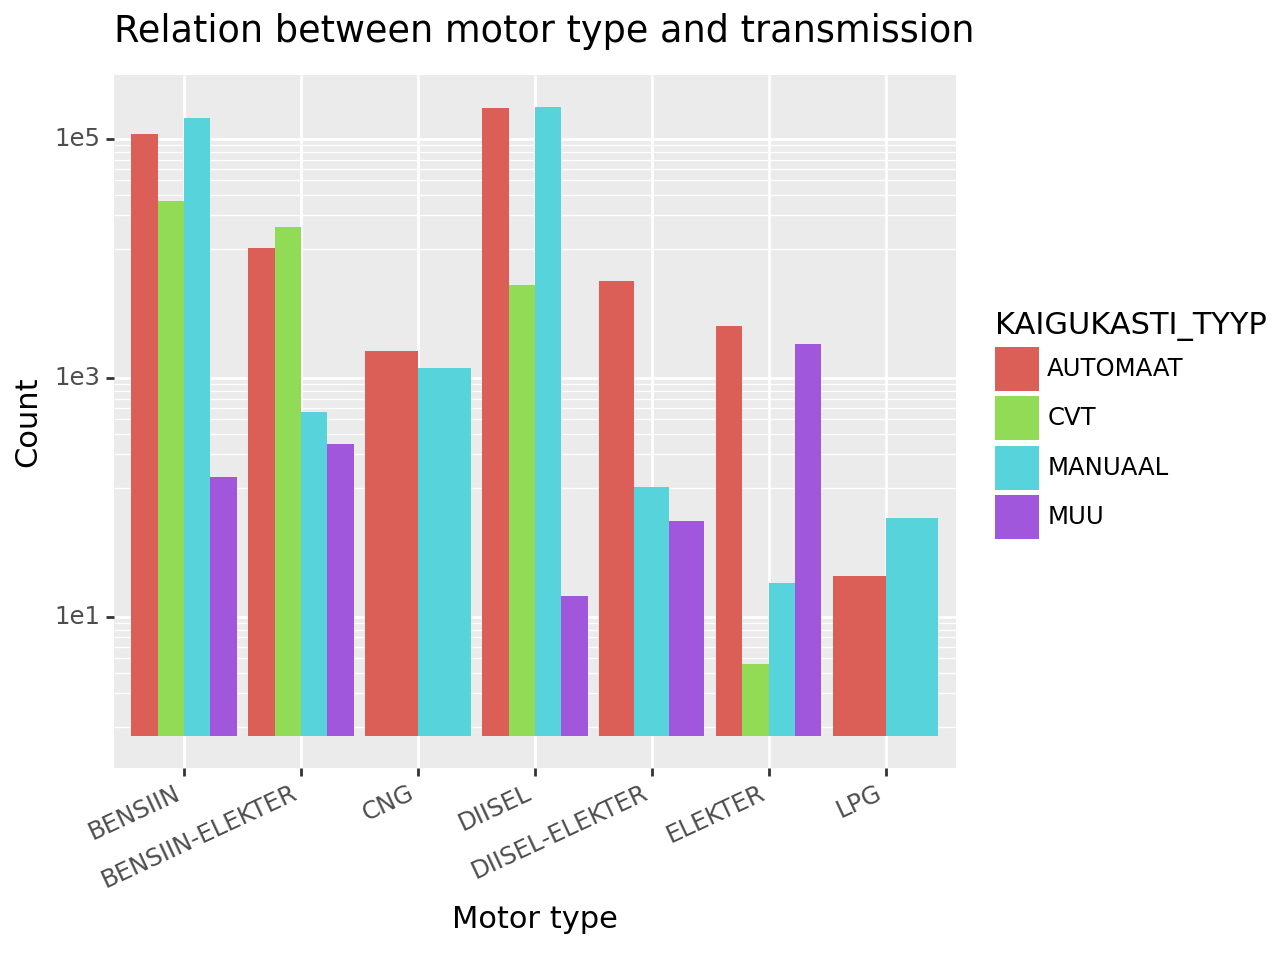

In [10]:
# Motor vs transmission
tmp1 = data_status.groupby(['MOOTORI_TYYP', 'KAIGUKASTI_TYYP']).size().reset_index(name='count')
fig = (
p9.ggplot(
    data = tmp1, 
    mapping = p9.aes(x = 'MOOTORI_TYYP', y='count', fill = 'KAIGUKASTI_TYYP'),
 )+ p9.scale_y_log10()
  +  p9.geom_bar(position = 'dodge', stat='identity')
  + p9.labs(x='Motor type', y='Count', color='Transmission type')
  + p9.ggtitle('Relation between motor type and transmission')
  + p9.theme(axis_text_x=p9.element_text(rotation=25, hjust=1))
).draw(show=True)
fig.savefig('img/motor_transmission.png', dpi=DPI)

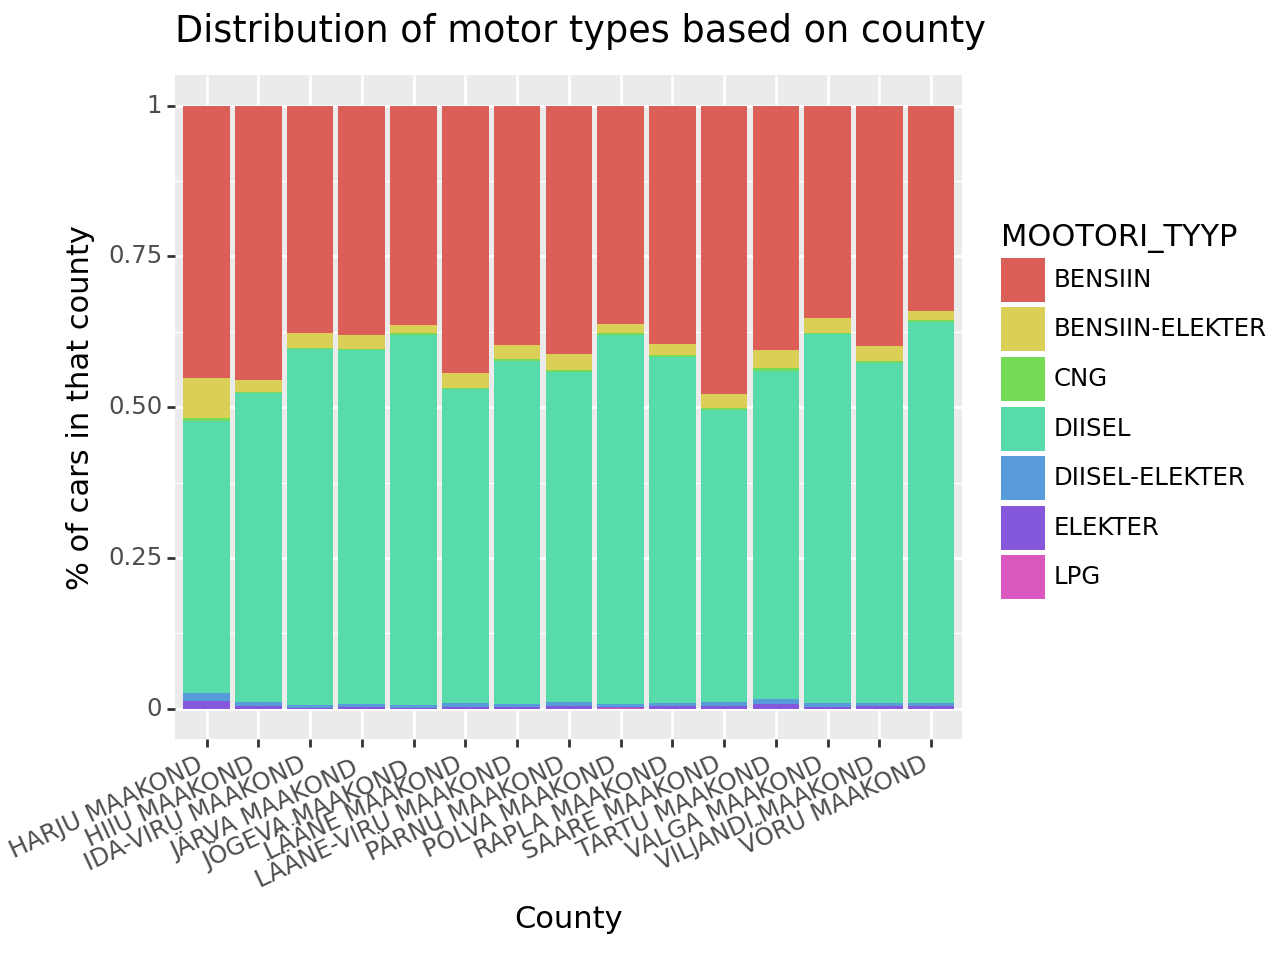

In [11]:
tmp1 = data_status.groupby(['VK/OM MAAKOND', 'MOOTORI_TYYP']).size().reset_index(name='count')
tmp2 =data_status.groupby(['VK/OM MAAKOND']).size().reset_index(name='total_count')
def norm_on_county(row):
    return row['count'] / tmp2[tmp2['VK/OM MAAKOND'] == row['VK/OM MAAKOND']].iloc[0, 1]
#tmp1['count_norm'] = tmp1.apply(norm_on_county, axis=1)
fig = (
p9.ggplot(
    data = tmp1, 
    mapping = p9.aes(x = 'VK/OM MAAKOND', y='count', fill = 'MOOTORI_TYYP'),
 )+  p9.geom_bar(position = 'fill', stat='identity')
  + p9.labs(x='County', y='\n\n% of cars in that county', color='Transmission type')
  + p9.ggtitle('Distribution of motor types based on county')
  + p9.theme(axis_text_x=p9.element_text(rotation=25, hjust=1))
).draw(show=True)
fig.savefig('img/motor_based_on_county.png', dpi=DPI)

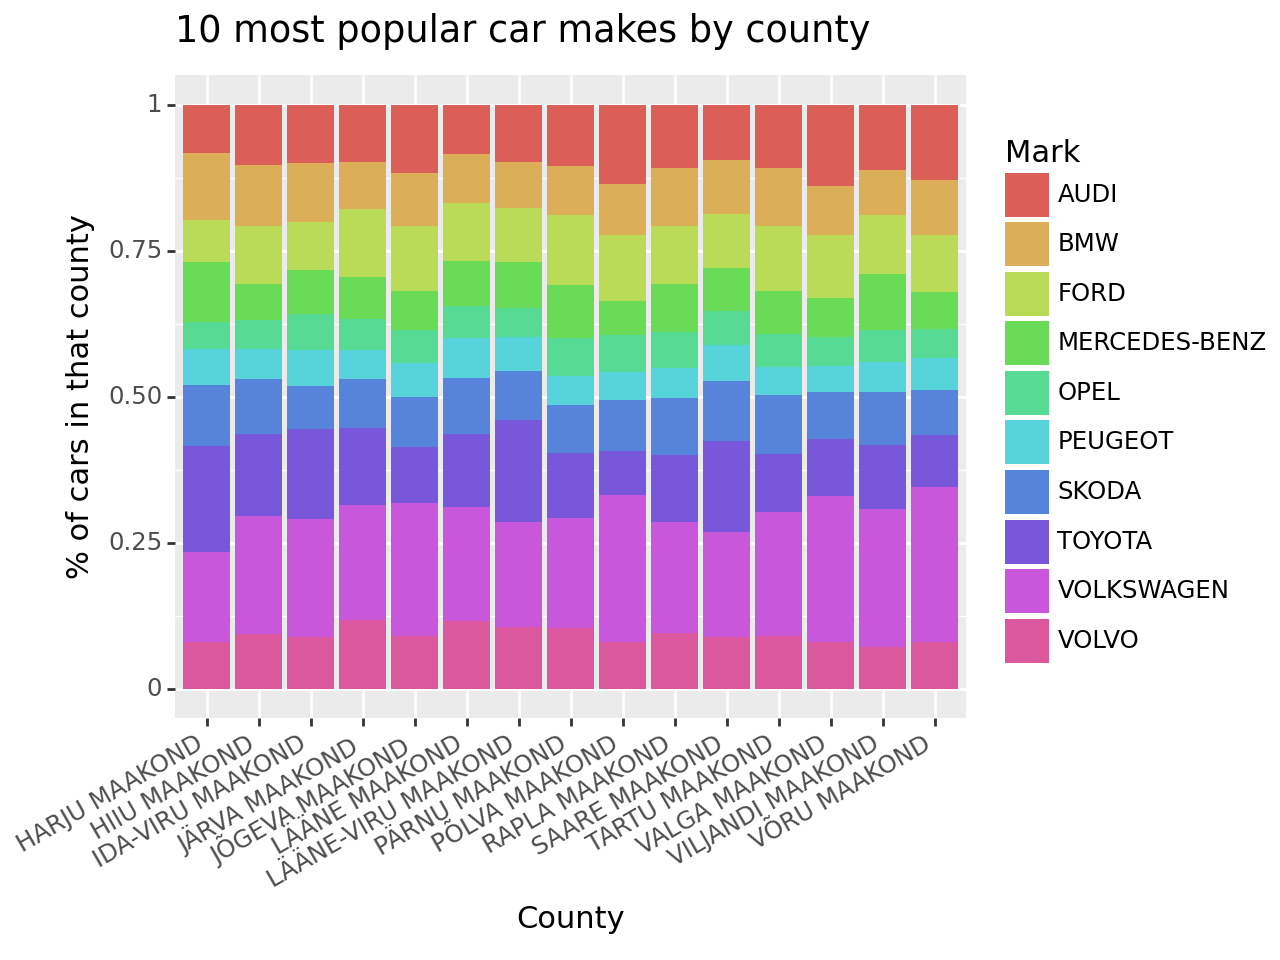

In [12]:
tmp1 = data_status.groupby(['VK/OM MAAKOND', 'Mark']).size().reset_index(name='count')
tmp2 =data_status.groupby(['VK/OM MAAKOND']).size().reset_index(name='total_count')
def norm_on_county(row):
    return row['count'] / tmp2[tmp2['VK/OM MAAKOND'] == row['VK/OM MAAKOND']].iloc[0, 1]
def popular_marks(n):
    tmp = data_status.groupby(['Mark']).size().reset_index(name='total_count')
    tmp = tmp.sort_values(by=['total_count'], ascending=False).head(n)['Mark'].values
    return tmp
popular = popular_marks(10)
tmp1 = tmp1[tmp1['Mark'].isin(popular)]
#tmp1['count_norm'] = tmp1.apply(norm_on_county, axis=1)
fig = (
p9.ggplot(
    data = tmp1, 
    mapping = p9.aes(x = 'VK/OM MAAKOND', y='count', fill = 'Mark'),
 )+  p9.geom_bar(position = 'fill', stat='identity')
  + p9.labs(x='County', y='\n\n% of cars in that county', color='Mark')
  + p9.ggtitle('10 most popular car makes by county')
  + p9.theme(axis_text_x=p9.element_text(rotation=30, hjust=1))
).draw(show=True)
fig.savefig('img/mark_based_on_county.png', dpi=DPI)

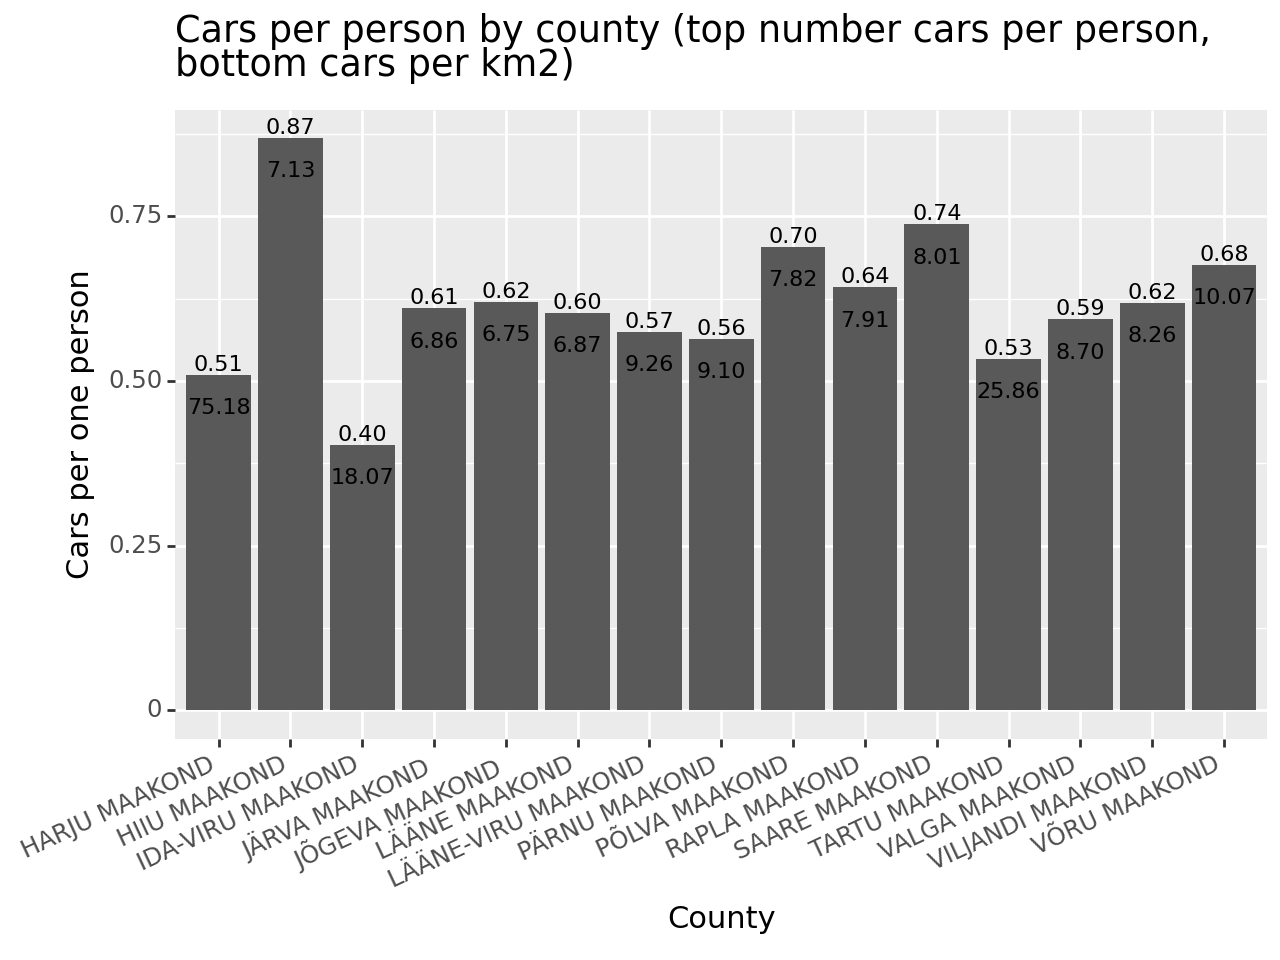

In [13]:
tmp1 = data_status.groupby(['VK/OM MAAKOND']).size().reset_index(name='total_count')
def cars_per_person(row):
    return row['total_count'] / county_data[county_data['county'] == row['VK/OM MAAKOND']].iloc[0]['population']
def cars_per_sqkm(row):
    return row['total_count'] / county_data[county_data['county'] == row['VK/OM MAAKOND']].iloc[0]['area']
tmp1['cars_per_person'] = tmp1.apply(cars_per_person, axis=1)
tmp1['cars_per_square_km'] = tmp1.apply(cars_per_sqkm, axis=1)
tmp1 = tmp1.sort_values(by=['cars_per_person'], ascending=False)
fig = (
p9.ggplot(
    data = tmp1, 
    mapping = p9.aes(x = 'VK/OM MAAKOND', y='cars_per_person'),
 )+ p9.geom_bar(stat='identity')
  + p9.geom_text(p9.aes(label='cars_per_person'), va='bottom', format_string='{:.2f}', size=8)
  + p9.geom_text(p9.aes(label='cars_per_square_km'), va='top', format_string='\n{:.2f}', size=8)
  + p9.labs(x='County', y='\n\nCars per one person')
  + p9.ggtitle('Cars per person by county (top number cars per person,\nbottom cars per km2)')
  + p9.theme(axis_text_x=p9.element_text(rotation=25, hjust=1))
).draw(show=True)
fig.savefig('img/cars_per_person.png', dpi=DPI)

## Find and visulize nice statistics (Tests)

In [14]:
# Data from 2023 only
data_road = vehicle_roadworthiness
data_road = data_road[data_road['KATEGOORIA'].isin(['M1G', 'M1', 'N1', 'N1G'])]
data_road = data_road[data_road['YLEVAATUSLIIK'].isin(['KORRALINE', 'KORDUV'])]

In [15]:
# OV - Oluline viga, EOV - Rohkem oluline
# VO - Väheoluline viga
fault_codes = {"OV": dict(), "VO": dict(), "EOV": dict()}
def count_codes(code):
    for c in code.split(';'):
        p, s = c.split(':')
        if s in fault_codes[p]:
            fault_codes[p][s] +=1
        else:
            fault_codes[p][s] = 1
for i in data_road[data_road['RIKKED'].notna()]['RIKKED']:
    count_codes(str(i))

top_ov_codes = sorted(fault_codes['OV'], key=fault_codes['OV'].get, reverse=True)[:10]
top_vo_codes = sorted(fault_codes['VO'], key=fault_codes['VO'].get, reverse=True)[:10]
top_eov_codes = sorted(fault_codes['EOV'], key=fault_codes['EOV'].get, reverse=True)[:10]

In [16]:
def resolve_sub_group(code):
    row = rikke_koodid[rikke_koodid['ID'] == code].iloc[0]
    if row['TYYP'] == 'ALAMGRUPP':
        return row['ID']
    return resolve_sub_group(row['VANEM_ID'])


def resolve_group(code):
    row = rikke_koodid[rikke_koodid['ID'] == code].iloc[0]
    if row['TYYP'] == 'GRUPP':
        return row['ID']
    return resolve_group(row['VANEM_ID'])

def resolve_name(code):
    row = rikke_koodid[rikke_koodid['ID'] == code].iloc[0]
    if np.isnan(row['VANEM_ID']):
        return row['NIMETUS']
    return resolve_name(row['VANEM_ID']) + " " + row['NIMETUS']

In [17]:
# Top 10 - OV
for i in top_ov_codes:
    print(fault_codes['OV'][i], resolve_name(int(i)))

16000 PIDURISÜSTEEM Seisupiduri toimimine ja tõhusus Seisupiduri tõhusus. Pidurdustõhusus on ebapiisav.
9062 PIDURISÜSTEEM Seisupiduri toimimine ja tõhusus Seisupiduri toimimine. Ühe ratta pidurdusjõud erineb rohkem kui 70% sama telje teise ratta maksimaalsest mõõdetud pidurdusjõust. Teekatse puhul kaldub sõiduk liigselt sirgjoonelt kõrvale.
8782 SAASTED Heitgaasid Ottomootori heitmed Ottomootori heitgaasid Heitgaasid ületavad nõuetega ettenähtud piirväärtuseid.
7293 SAASTED Muud keskkonnaga seotud puudused Vedelikulekked Mistahes vedelikuleke (v.a. vesi), mis võib kujutada ohtu teistele liiklejatele või keskkonnale.
6682 TULED, HELKURID JA ELEKTRISEADMED Piduritulelaternad Piduritulelaternate seisund ja toimimine Valgusallikas on defektne või puudub (latern koosneb üksikust piduritule valgusallikast või mitmest piduritule valgusallikast koosneval laternal on üle 1/3 valgusallikatest defektsed).
6549 JUHTIMISSEADE Mehaaniline seisund Roolihoovastiku seisund Liigend on kulunud.
6332 TEL

In [18]:
# Top 10 - VO
for i in top_vo_codes:
    print(fault_codes['VO'][i], resolve_name(int(i)))

51754 MUU VARUSTUS Tulekustuti Puudub, ei vasta nõuetele või on kohustuslikus korras kontrollimata.
24931 TULED, HELKURID JA ELEKTRISEADMED Tagumise registreerimismärgitule latern. Tagumise registreerimismärgitule laterna seisund ja toimimine. Registreerimismärk on osaliselt valgustamata.
17369 TULED, HELKURID JA ELEKTRISEADMED Lähi- ja kaugtulelaternad Lähi- ja kaugtulelaternate seisund ja toimimine Laterna seisukord on halvenenud.
14964 TELJED, VELJED, REHVID, VEDRUSTUS Vedrustus. Vedrud ja stabilisaator. Stabilisaatori puksil või kuulliigendis esineb lõtkusid.
13374 TULED, HELKURID JA ELEKTRISEADMED Lähi- ja kaugtulelaternad Lähitulelaternate reguleeritus Reguleerimata - valgusvihu langemisnurk üle tootja ettenähtud langemisnurga.
13361 TULED, HELKURID JA ELEKTRISEADMED Ääretulelaternad ning päevatulelaternad Ääre- ja päevatulelaternate seisund ja toimimine Ääretule valgusallikas on defektne või puudub (mitmest ääretule valgusallikast koosneval laternal on üle 1/3 valgusallikatest d

In [19]:
# Top 10 - EOV
for i in top_eov_codes:
    print(fault_codes['EOV'][i], resolve_name(int(i)))

556 PIDURISÜSTEEM Mehaaniline seisund ja toimimine Jäigad piduritorud. Torud või ühenduskohad lekivad.
233 TULED, HELKURID JA ELEKTRISEADMED Piduritulelaternad Piduritulelaternate seisund ja toimimine Ükski piduritulelatern ei põle.
143 PIDURISÜSTEEM Mehaaniline seisund ja toimimine Töösilindrid (sh vedruakud või hüdraulilised silindrid) ja pidurisadul. Lekib.
88 TELJED, VELJED, REHVID, VEDRUSTUS Veljed ja rehvid. Rehvid. Koord on nähtav või katki.
62 PIDURISÜSTEEM Mehaaniline seisund ja toimimine Jäigad piduritorud. Torud on oluliselt kahjustunud või korrodeerunud.
59 PIDURISÜSTEEM Mehaaniline seisund ja toimimine Elastsed pidurivoolikud. Voolikud või ühenduskohad lekivad.
56 PIDURISÜSTEEM Seisupiduri toimimine ja tõhusus Seisupiduri toimimine. Ühe või enama ratta pidur on töökõlbmatu.
54 PIDURISÜSTEEM Mehaaniline seisund ja toimimine Jäigad piduritorud. Ilmne purunemise või murdumise oht.
44 RAAM, KERE JA SELLELE KINNITATAVAD OSAD Raam, kere ja sellele kinnitatavad osad Kütusepaak ja

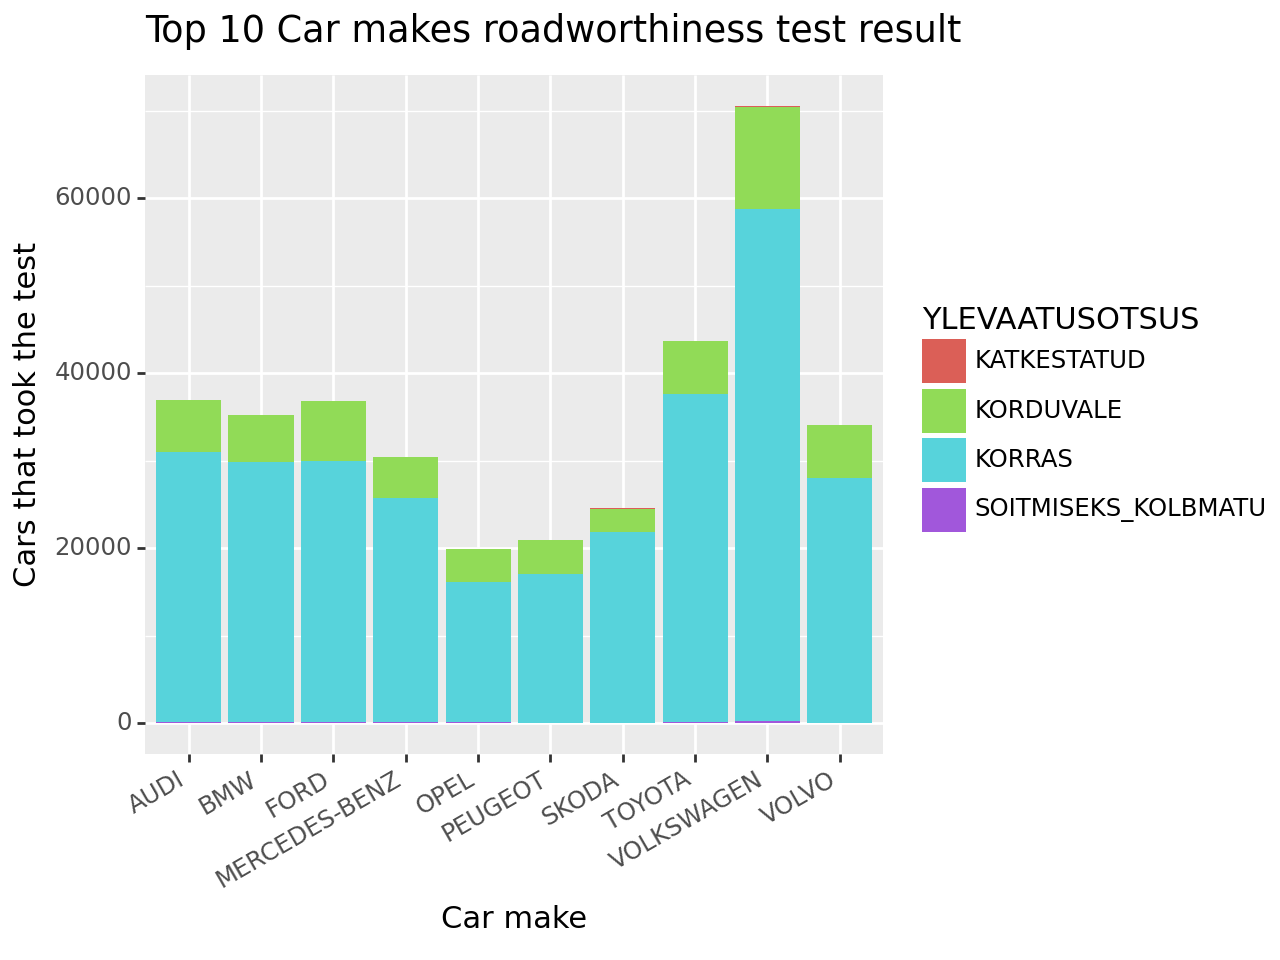

In [20]:
# This is not good, does not show much

tmp1 = data_road.groupby(['YLEVAATUSOTSUS', 'MARK']).size().reset_index(name='count')
tmp2 =data_road.groupby(['MARK']).size().reset_index(name='total_count')

def norm_on_fail(row):
    return row['count'] / tmp2[tmp2['MARK'] == row['MARK']].iloc[0, 1]
def popular_marks2(n):
    tmp = data_road.groupby(['MARK']).size().reset_index(name='total_count')
    tmp = tmp.sort_values(by=['total_count'], ascending=False).head(n)['MARK'].values
    return tmp

popular = popular_marks(10)
tmp1 = tmp1[tmp1['MARK'].isin(popular)]

fig = (
p9.ggplot(
    data = tmp1, 
    mapping = p9.aes(x = 'MARK', y='count', fill = 'YLEVAATUSOTSUS'),
 )+  p9.geom_bar(position = 'stack', stat='identity')
  + p9.labs(x='Car make', y='Cars that took the test', color='Mark')
  + p9.ggtitle('Top 10 Car makes roadworthiness test result')
  + p9.theme(axis_text_x=p9.element_text(rotation=30, hjust=1))
).draw(show=True)
fig.savefig('img/cars_roadworthiness_by_make.png', dpi=DPI)

Index(['Andmed seisuga', 'YLDINE_STAATUS', 'EESTIS_ESMAREG_KP',
       'ESMANE_REG_KP', 'KAIGUKASTI_TYYP', 'Kütuse tüüp', 'MOOTORI_TYYP',
       'MOOTORI_MAHT', 'MOOTORI_VOIMSUS', 'HYBRIIDI_TYYP',
       'Kütusekombinatsioon', 'CO2_NEDC', 'CO2_WLTP', 'Kategooria', 'Keretüüp',
       'Mark', 'Mudel', 'REG_MASS', 'TAISMASS', 'TYHIMASS', 'TELGI_KOKKU',
       'HEITMENORM', 'VARV', 'ISTEKOHTI', 'Kere nimetus', 'VK/OM MAAKOND',
       'VK/OM TYYP_', 'ARV'],
      dtype='object')


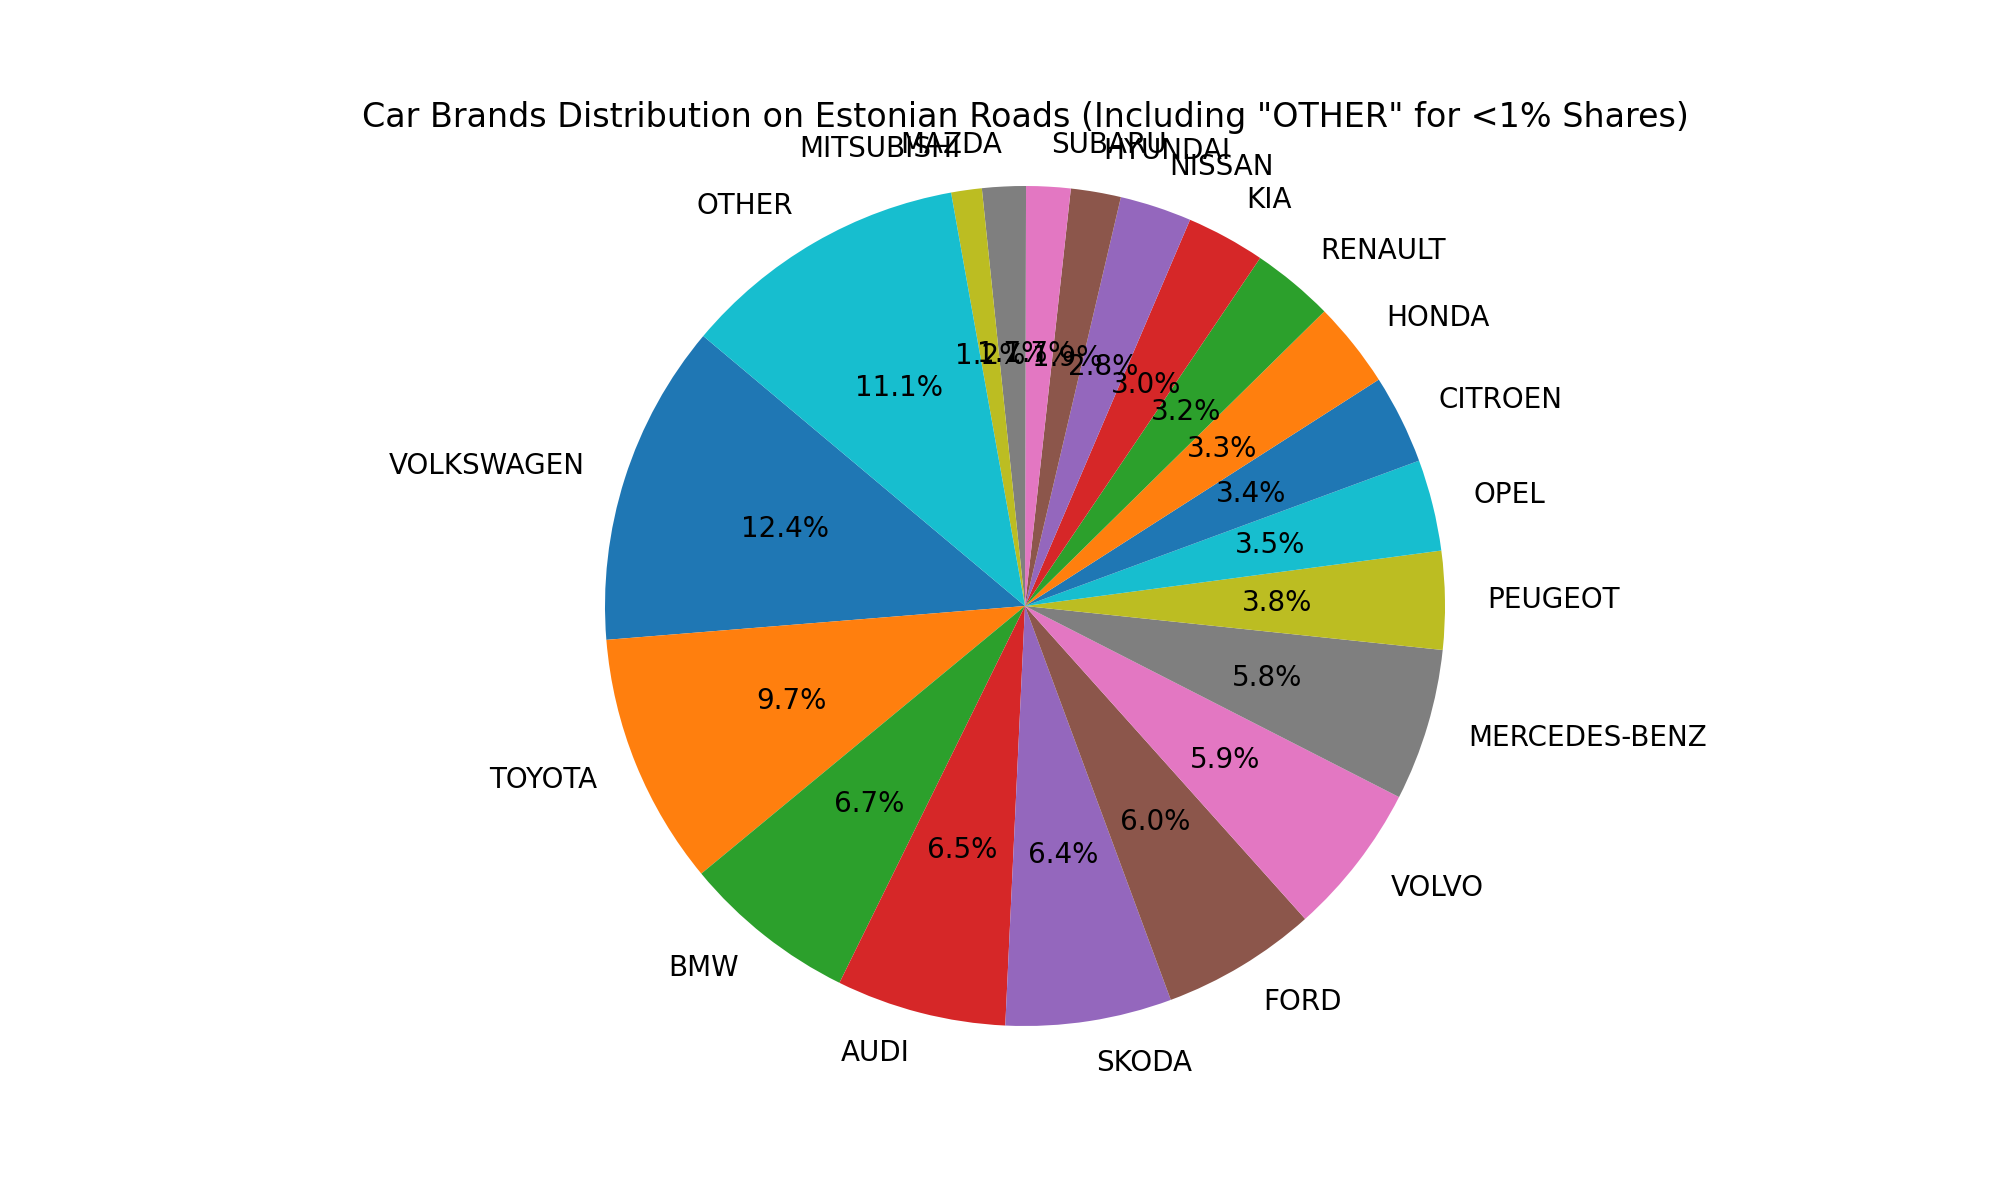

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Check the column names
print(data_status.columns)

# If 'MARK' is the correct column name, this should work
brand_counts = data_status['Mark'].value_counts()

# Calculate the total number of registered vehicles
total_vehicles = brand_counts.sum()

# Calculate the percentage share of each brand
brand_counts_percentage = (brand_counts / total_vehicles) * 100

# Clump together brands with less than 1% share into 'OTHER'
other_brands_total = brand_counts_percentage[brand_counts_percentage < 1].sum()
brand_counts_clumped = brand_counts_percentage[brand_counts_percentage >= 1]
if other_brands_total > 0:
    brand_counts_clumped['OTHER'] = other_brands_total

# Plotting
plt.figure(figsize=(10, 6))
plt.pie(brand_counts_clumped, labels=brand_counts_clumped.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.title('Car Brands Distribution on Estonian Roads (Including "OTHER" for <1% Shares)')

# Save the plot to the specified path before displaying it
plt.savefig('img/cars_brand_distribution.png', dpi=DPI)

# Display the plot
plt.show()

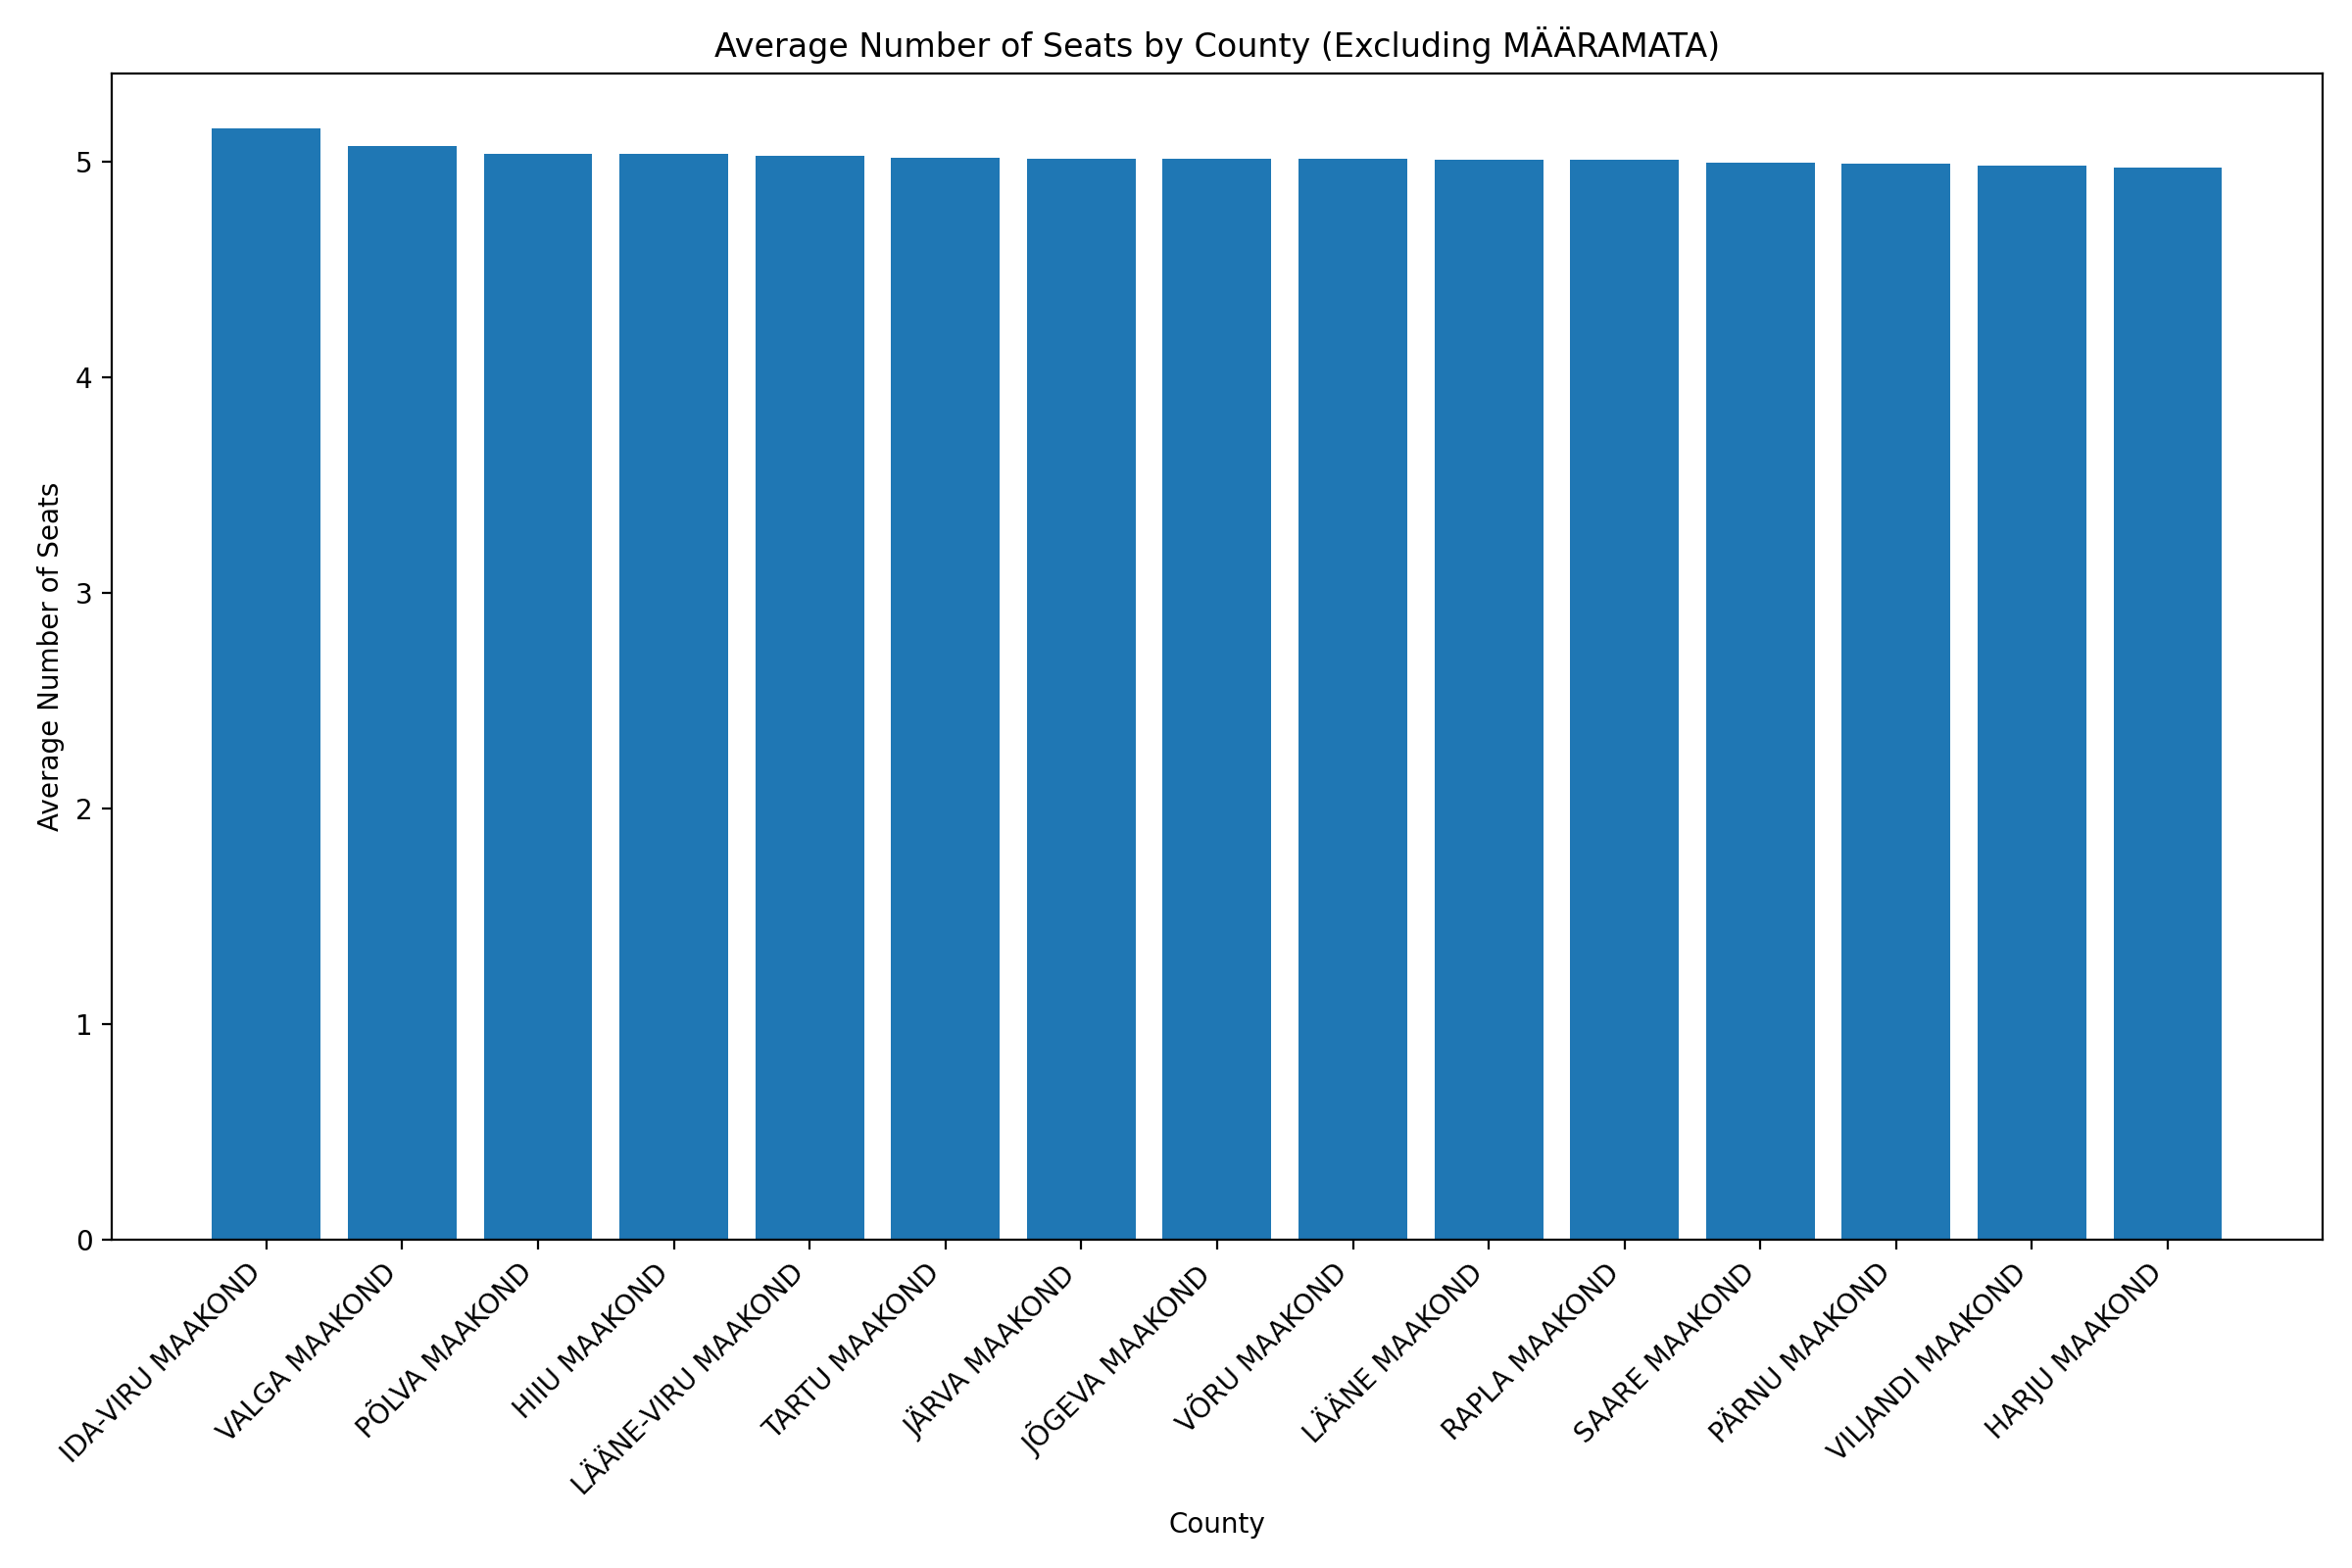

In [30]:
# Filter out the entries with 'MÄÄRAMATA' county
filtered_vehicle_status = data_status[data_status['VK/OM MAAKOND'] != 'MÄÄRAMATA']

# Calculate average number of seats for each county
# Note: Replace 'VK/OM MAAKOND' with your actual county column name if different
average_seats = filtered_vehicle_status.groupby('VK/OM MAAKOND')['ISTEKOHTI'].mean().reset_index()

# Sort the results from highest to lowest average number of seats
average_seats_sorted = average_seats.sort_values('ISTEKOHTI', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(average_seats_sorted['VK/OM MAAKOND'], average_seats_sorted['ISTEKOHTI'])

# Set plot titles and labels
plt.title('Average Number of Seats by County (Excluding MÄÄRAMATA)')
plt.xlabel('County')
plt.ylabel('Average Number of Seats')  # Adjust if 'ISTEKOHTI' represents a different concept
plt.xticks(rotation=45, ha='right')  # Improves readability of county names

# Ensure the x-axis labels do not overlap and are readable
plt.tight_layout()

# Save the plot to the specified path before displaying it
plt.savefig('img/seats_by_county.png', dpi=DPI)

# Display the plot
plt.show()



In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load the dataset
try:
    df = pd.read_csv('vehicle_status.csv', delimiter=';', low_memory=False)
    print(df.head())
except Exception as e:
    print("Error reading CSV:", e)
    df = None

if df is not None:
    print("DataFrame loaded successfully.")
    # Filter out entries where YLDINE_STAATUS is PEATATUD and VK/OM MAAKOND is MÄÄRAMATA
    df = df[(df['YLDINE_STAATUS'] != 'PEATATUD') & (df['VK/OM MAAKOND'] != 'MÄÄRAMATA')]

    # Select relevant columns
    relevant_columns = ['Mark', 'Mudel', 'VK/OM MAAKOND']
    data = df[relevant_columns]

    # Handle missing values if necessary
    # data = data.dropna()

    # Encode categorical features
    label_encoders = {}
    for column in relevant_columns:
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

    # Balance dataset to avoid overtraining on any specific VK/OM MAAKOND
    min_count = data['VK/OM MAAKOND'].value_counts().min()
    balanced_data = data.groupby('VK/OM MAAKOND').sample(n=min_count, random_state=42)

    # Split data into features and target
    X = balanced_data[['Mark', 'Mudel']]
    y = balanced_data['VK/OM MAAKOND']

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize and train the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X, y)

    # Function to randomly select 10 cars from a specified VK/OM MAAKOND and predict their VK/OM MAAKOND
    def predict_random_cars(vk_om_maakond, model, data, label_encoders):
        filtered_data = data[data['VK/OM MAAKOND'] == label_encoders['VK/OM MAAKOND'].transform([vk_om_maakond])[0]]
        sample = filtered_data.sample(n=20, random_state=42)
        sample_features = sample[['Mark', 'Mudel']]
        predictions = model.predict(sample_features)
        return label_encoders['VK/OM MAAKOND'].inverse_transform(predictions)

    # Example usage
    vk_om_maakond = 'VALGA MAAKOND'  # Replace with the VK/OM MAAKOND you want to test
    predictions = predict_random_cars(vk_om_maakond, model, data, label_encoders)
    print("Predictions:", predictions)

    # Evaluate the model
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y, y)}")
    print(classification_report(y, y))
else:
    print("DataFrame not loaded.")


  Andmed seisuga YLDINE_STAATUS EESTIS_ESMAREG_KP ESMANE_REG_KP  \
0     01.12.2023       PEATATUD        01.01.0987    01.01.1987   
1     01.12.2023       PEATATUD        30.12.1899    01.01.1987   
2     01.12.2023       PEATATUD        01.01.1900    01.01.1939   
3     01.12.2023       PEATATUD        01.01.1900    01.01.1939   
4     01.12.2023       PEATATUD        01.01.1900    01.01.1948   

  KAIGUKASTI_TYYP Kütuse tüüp MOOTORI_TYYP  MOOTORI_MAHT  MOOTORI_VOIMSUS  \
0             NaN     BENSIIN      BENSIIN        1452.0             55.0   
1             NaN      DIISEL       DIISEL        1608.0             40.0   
2             NaN     BENSIIN      BENSIIN         690.0             15.0   
3             NaN     BENSIIN      BENSIIN        2120.0             58.0   
4         MANUAAL     BENSIIN      BENSIIN        2445.0             52.0   

  HYBRIIDI_TYYP  ... TAISMASS  TYHIMASS  TELGI_KOKKU HEITMENORM      VARV  \
0           NaN  ...   1510.0    1050.0          2.0     

C:\Users\marku\AppData\Local\Temp\ipykernel_6872\3385832852.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\marku\AppData\Local\Temp\ipykernel_6872\3385832852.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\marku\AppData\Local\Temp\ipykernel_6872\3385832852.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Predictions: ['PÕLVA MAAKOND' 'LÄÄNE-VIRU MAAKOND' 'PÕLVA MAAKOND' 'JÄRVA MAAKOND'
 'IDA-VIRU MAAKOND' 'JÕGEVA MAAKOND' 'VALGA MAAKOND' 'VALGA MAAKOND'
 'HIIU MAAKOND' 'LÄÄNE MAAKOND' 'RAPLA MAAKOND' 'PÕLVA MAAKOND'
 'VALGA MAAKOND' 'LÄÄNE MAAKOND' 'PÕLVA MAAKOND' 'VILJANDI MAAKOND'
 'VALGA MAAKOND' 'HARJU MAAKOND' 'PÄRNU MAAKOND' 'PÄRNU MAAKOND']
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6518
           1       1.00      1.00      1.00      6518
           2       1.00      1.00      1.00      6518
           3       1.00      1.00      1.00      6518
           4       1.00      1.00      1.00      6518
           5       1.00      1.00      1.00      6518
           6       1.00      1.00      1.00      6518
           7       1.00      1.00      1.00      6518
           8       1.00      1.00      1.00      6518
           9       1.00      1.00      1.00      6518
          10       1.00      1.00      1.